## Procesing Geolocation information using Mvision EDR command line tool and Custom Geolocation collector


In [2]:
# Execute the command line search tool indicating the search template, the format and the output

!python ../mvedr-search.py -u "YOUR_MVEDR_USERNAME" -p "YOUR_USERNAME_PASSWORD" -i ../hunting/geolocation/location.xml -f json -o file

# Once the excution finish a file is created on the folder \output
print('Folder content:\n')
!dir ..\output\

# The content of the file is the json result of the MvEDR Real Time Search defined on the template location.xml
print('\nContent of file:\n')
!type ..\output\20201125131613_Device_Location.json

Folder content:

 El volumen de la unidad C es Windows
Content of file:

 El n�mero de serie del volumen es: F6A0-2C3B

 Directorio de c:\Users\cmunoz\OneDrive - McAfee\git_repos\edrsearch\output

25/11/2020  13:31    <DIR>          .
25/11/2020  13:31    <DIR>          ..
25/11/2020  13:16             1.966 20201125131613_Device_Location.json

               1 archivos          1.966 bytes
               2 dirs  90.146.500.608 bytes libres
{"startIndex": 0, "itemsPerPage": 4, "currentItemCount": 4, "totalItems": 4, "items": [{"output": {"HostInfo|hostname": "WINDOWS81", "_GetPublic_IP|ip_address": "206.198.150.50", "_GetPublic_IP|country": "US", "_GetPublic_IP|city": "Washington", "_GetPublic_IP|region": "Washington, D.C.", "_GetPublic_IP|postal": "20045", "_GetPublic_IP|timezone": "America/New_York", "_GetPublic_IP|location": "38.8951,-77.0364", "_GetPublic_IP|asn": "AS46160 Skytap, Inc"}, "count": 1, "created_at": "2020-11-25T12:15:11.308Z", "id": "55dd84c54beda6bc1c2681f58ea3322b"}

In [3]:
import json
import os
from pathlib import Path

In [5]:
# Load the json information contained on the file into a variable
current_path = Path(os.getcwd())
file_path = str(current_path.parent) + os.sep + 'output' + os.sep + '20201125131613_Device_Location.json'

with open(file_path, 'rb') as json_data:
    my_data = json.load(json_data)

print(json.dumps(my_data, indent=4, sort_keys=True))

{
    "currentItemCount": 4,
    "items": [
        {
            "count": 1,
            "created_at": "2020-11-25T12:15:11.308Z",
            "id": "55dd84c54beda6bc1c2681f58ea3322b",
            "output": {
                "HostInfo|hostname": "WINDOWS81",
                "_GetPublic_IP|asn": "AS46160 Skytap, Inc",
                "_GetPublic_IP|city": "Washington",
                "_GetPublic_IP|country": "US",
                "_GetPublic_IP|ip_address": "206.198.150.50",
                "_GetPublic_IP|location": "38.8951,-77.0364",
                "_GetPublic_IP|postal": "20045",
                "_GetPublic_IP|region": "Washington, D.C.",
                "_GetPublic_IP|timezone": "America/New_York"
            }
        },
        {
            "count": 1,
            "created_at": "2020-11-25T12:15:11.683Z",
            "id": "461e0c524a40f8f3828809cfdf873d4a",
            "output": {
                "HostInfo|hostname": "WINDOWS7",
                "_GetPublic_IP|asn": "AS46160 S

In [6]:
# Show the coordinates in a map
import matplotlib.pyplot as pp
import cartopy

(-180.0, 180.0, -90.0, 90.0)

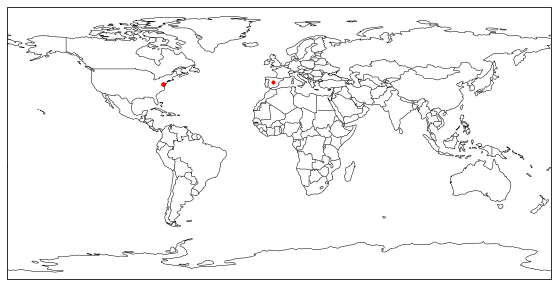

In [30]:
pp.figure(figsize=(10,5))

axes = pp.axes(projection=cartopy.crs.PlateCarree())

axes.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)
axes.add_feature(cartopy.feature.BORDERS, linewidth=0.5)

for item in my_data['items']:
    coords = item['output']['_GetPublic_IP|location'].split(',')

    latitude  = float(coords[0])
    longitude = float(coords[1])
    
    axes.plot(longitude, latitude, 'r.')

pp.axis(xmin=-180,xmax=180,ymin=-90,ymax=90)

# There out of the four systems, connect from Washintong, US the other system connects from Madrid ES
